<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%209/SVM_Classification_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.svm import SVC  # Model Support Vector Classification
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi data
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
)  # Metrik evaluasi
import matplotlib.pyplot as plt  # Untuk visualisasi ROC Curve
import seaborn as sns  # Untuk visualisasi data

In [2]:
from google.colab import files

# Memunculkan dialog unggah file
uploaded = files.upload()

# Mengecek file yang diunggah
print(uploaded.keys())


Saving MaterialStrength.csv to MaterialStrength.csv
dict_keys(['MaterialStrength.csv'])


In [27]:
import pandas as pd

# Membaca file (ganti "CreditDataset.csv" dengan nama file Anda)
data = pd.read_csv("MaterialStrength.csv")
print(data.head())

# 2. Memeriksa struktur data
print("Lima baris pertama dataset:")
print(data.head())
print("\nInformasi dataset:")
print(data.info())
print("\nStatistik deskriptif dataset:")
print(data.describe())


      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  
Lima baris pertama dataset:
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.3

In [29]:
print(data.columns)


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


In [30]:
X = data.drop(columns=['x10'])  # Ganti 'target_feature' dengan nama kolom target yang benar
y = data['x10']


In [31]:
# 4. Memeriksa tipe data pada fitur
print("\nTipe data tiap kolom:")
print(X.dtypes)


Tipe data tiap kolom:
x1                float64
x2                float64
x3                float64
x4                float64
x5                float64
x6                float64
x7                float64
x8                  int64
x9                float64
x11               float64
x12                 int64
x13               float64
x14                object
x15                object
target_feature    float64
dtype: object


In [32]:
# Identifikasi kolom non-numerik untuk encoding (jika ada)
categorical_columns = X.select_dtypes(include=['object']).columns
print("\nKolom kategori yang akan di-encode:", categorical_columns)



Kolom kategori yang akan di-encode: Index(['x14', 'x15'], dtype='object')


In [33]:
# Jika ada kolom kategoris, lakukan encoding
if len(categorical_columns) > 0:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan nanti

In [35]:
# 5. Membagi data menjadi data latih dan data uji (70% latih, 30% uji)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
except ValueError:
    print("Warning: The least populated class has only 1 member. Stratification is disabled.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    # Remove stratify to avoid the error

In [36]:
# 6. Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 7. Membuat model SVM
# Instead of SVC, use SVR for regression tasks with continuous targets
from sklearn.svm import SVR  # Import SVR

svm_model = SVR()  # Create an SVR model
svm_model.fit(X_train_scaled, y_train)

SVR()

In [40]:
# 8. Memprediksi dan mengevaluasi model
y_pred = svm_model.predict(X_test_scaled)

# For SVR (regression), use regression metrics like MSE or R-squared
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4595.481363611461
R-squared: 0.45697797522422157


Mean Squared Error: 4595.481363611461
R-squared: 0.45697797522422157


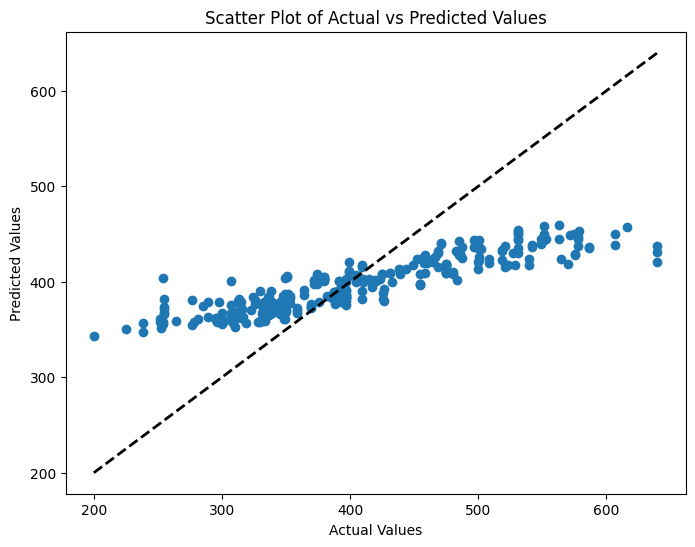

In [45]:
# Evaluasi dengan confusion matrix

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example: Discretize predictions based on a threshold
threshold = y_train.mean()  # Or any other relevant threshold
y_pred_class = [1 if val > threshold else 0 for val in y_pred]

# Instead of confusion matrix, consider a scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

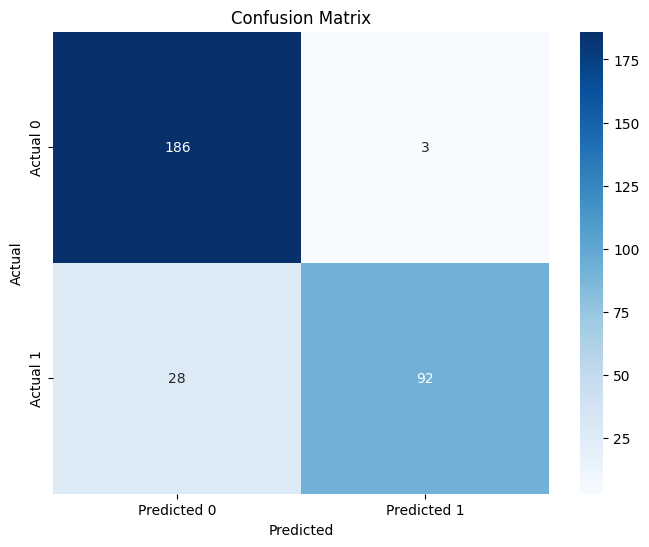

In [47]:
# Visualisasi confusion matrix

# Convert y_test to discrete values using the same threshold
threshold = y_train.mean()  # Or any other relevant threshold
y_test_class = [1 if val > threshold else 0 for val in y_test]

# Now both y_test_class and y_pred_class are binary
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC AUC Score: 0.8753968253968255


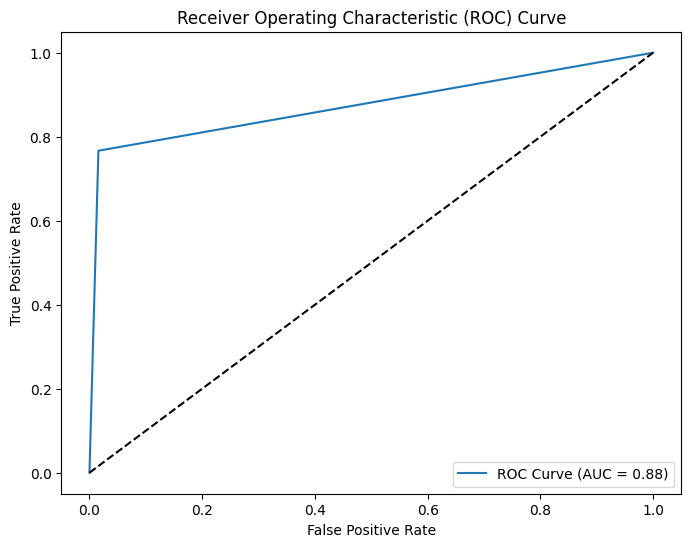

In [48]:
# Evaluasi ROC AUC

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_class, [1 if val > threshold else 0 for val in y_pred])
print(f"ROC AUC Score: {roc_auc}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, [1 if val > threshold else 0 for val in y_pred])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.show()